Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [2]:
import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


###1) What are the appropriate visualizations to answer the question "What was the typical fare paid for passage on the Titanic?"



Histogram or Boxplot

###2) Create the visualizations you selected in 2).  

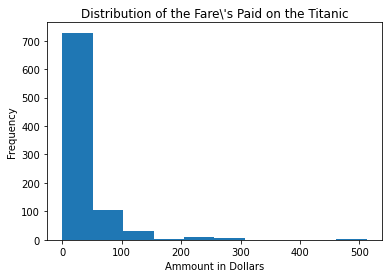

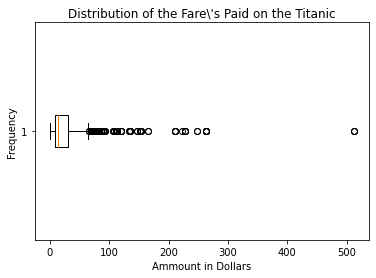

In [12]:
import matplotlib.pyplot as plt

plt.hist(Titanic['Fare'])

plt.title(r'Distribution of the Fare\'s Paid on the Titanic')
plt.ylabel('Frequency')
plt.xlabel('Ammount in Dollars')

plt.show()

plt.boxplot(Titanic['Fare'], vert=False)

plt.title(r'Distribution of the Fare\'s Paid on the Titanic')
plt.ylabel('Frequency')
plt.xlabel('Ammount in Dollars')

plt.show()

###3) Describe your results in a sentence or two.

An overwhelming majority of the passengers on the Titanic paid less than \$100 for their fare. The max fare paid was $500.

###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

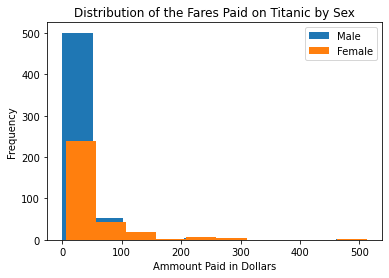

In [14]:
male_subset = Titanic[Titanic['Sex'] == 'male']
female_subset = Titanic[Titanic['Sex'] == 'female']

plt.hist(male_subset['Fare'], label='Male')
plt.hist(female_subset['Fare'], label='Female')

plt.title('Distribution of the Fares Paid on Titanic by Sex')
plt.ylabel('Frequency')
plt.xlabel('Ammount Paid in Dollars')
plt.legend(loc='upper right')

plt.show()

###5) Describe the difference in distribution of fare paid between male and female passengers.

Male and female passengers paid about the same rate for their ticket to board the Titanic. 

###6) Make a bar plot to show the frequency of individuals in each passenger class.

col_0   count
Pclass       
1         216
2         184
3         487


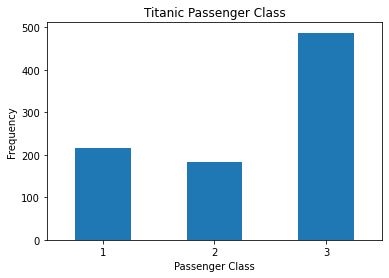

In [18]:
print(pd.crosstab(Titanic['Pclass'], columns='count'))

df = pd.DataFrame({'label':[1,2,3], 'value':[216,184,487]})

ax = df.plot.bar(x='label',y='value',rot=0)

plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.title(r'Titanic Passenger Class')

ax.get_legend().remove()

plt.show()

###7) Summarize your results from 6)

Most of the passengers on the Titanic were 3rd class, with 1st class being the next most common, and 2nd being the least common.

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

col_0                    count
Parents/Children_Aboard       
0                          674
1                          118
2                           80
3                            5
4                            4
5                            5
6                            1


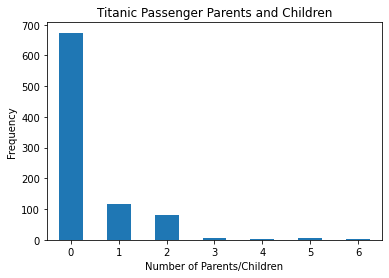

In [20]:
print(pd.crosstab(Titanic['Parents/Children_Aboard'], columns='count'))

df = pd.DataFrame({'label':[0,1,2,3,4,5,6], 'value':[674,118,80,5,4,5,1]})

ax = df.plot.bar(x='label',y='value',rot=0)

plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.title(r'Titanic Passenger Parents and Children')

ax.get_legend().remove()

plt.show()

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

Most of the passengers aborard the Titanic were traveling alone. 

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [54]:
adult = Titanic['Age'] >= 18
Titanic['is_adult'] = adult
Titanic.head(20)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare,is_adult
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,True
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,True
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,True
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,True
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,True
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,True
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,True
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,False
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333,True
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,False


###11) Make a cross-tab of survival by age (child vs adult).

In [57]:
print(pd.crosstab(Titanic['Survived'], Titanic['is_adult']))

is_adult  False  True 
Survived              
0            65    480
1            65    277


###12) Create a new data frame to hold the data for the figure.

In [58]:
survival_by_age = pd.DataFrame({'Adult':[480,277], 'Child':[65,65]})
survival_by_age

,Adult,Child
0,480,65
1,277,65


###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

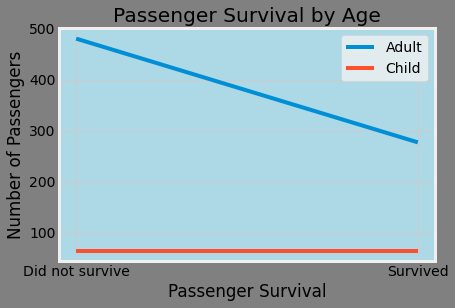

In [60]:
fig, ax = plt.subplots() 

plt.style.use('fivethirtyeight')

fig.set_facecolor('grey')


my_xticks = ['Did not survive','Survived']
ax.plot(my_xticks,survival_by_age['Adult'],label = 'Adult')
ax.plot(my_xticks,survival_by_age['Child'], label = 'Child')


ax.set_facecolor('lightblue')


ax.set_title("Passenger Survival by Age")
ax.set_xlabel('Passenger Survival')
ax.set_ylabel('Number of Passengers')

ax.legend()
plt.show()

###14) Summarize your results about passenger survival by age.

More adults died on the Titanic than chilren on a percentage basis. With a total of 37% of adults surviving the wreckage vs. 50% of children. 

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)